LOADING NECESSARY LIBRARIES

In [1]:
#Libraries in python

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

*Uploading file to Google Colab*

In [2]:
from google.colab import files
files.upload()  # Use this to upload the file and provide the correct path afterward

Saving insurance_data.csv to insurance_data.csv


{'insurance_data.csv': b'months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39\n328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,\n228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,

LOADING DATASET

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('insurance_data.csv')

# Adjust Pandas options to display more rows and columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

# Print the first 50 rows of the dataset
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                   NaN             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

**CHECKING DATA STRUCTURE AND MISSING VALUES**

*Checking data structure*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

*Checking missing values*

In [5]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available           0
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
auto_make                         0
auto_model                        0
auto_year                         0
fraud_reported                    0
_c39                           1000
dtype: int64

*Checking for rows with ? marks*

In [6]:
# Count rows with '?' for each column
columns_with_question_mark_counts = data.isin(['?']).sum()

# Filter and display only columns with non-zero counts
columns_with_question_mark_counts = columns_with_question_mark_counts[columns_with_question_mark_counts > 0]

if not columns_with_question_mark_counts.empty:
    print("Number of rows with '?' in each column:")
    print(columns_with_question_mark_counts)
else:
    print("No columns contain '?'.")

Number of rows with '?' in each column:
collision_type             178
property_damage            360
police_report_available    343
dtype: int64


*Converting rows with ? mark to NAN (Not a number)*

In [7]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                         0
police_report_available         343
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
auto_make                         0
auto_model                        0
auto_year                         0
fraud_reported                    0
_c39                           1000
dtype: int64

*Visualising missing values in a barchart*

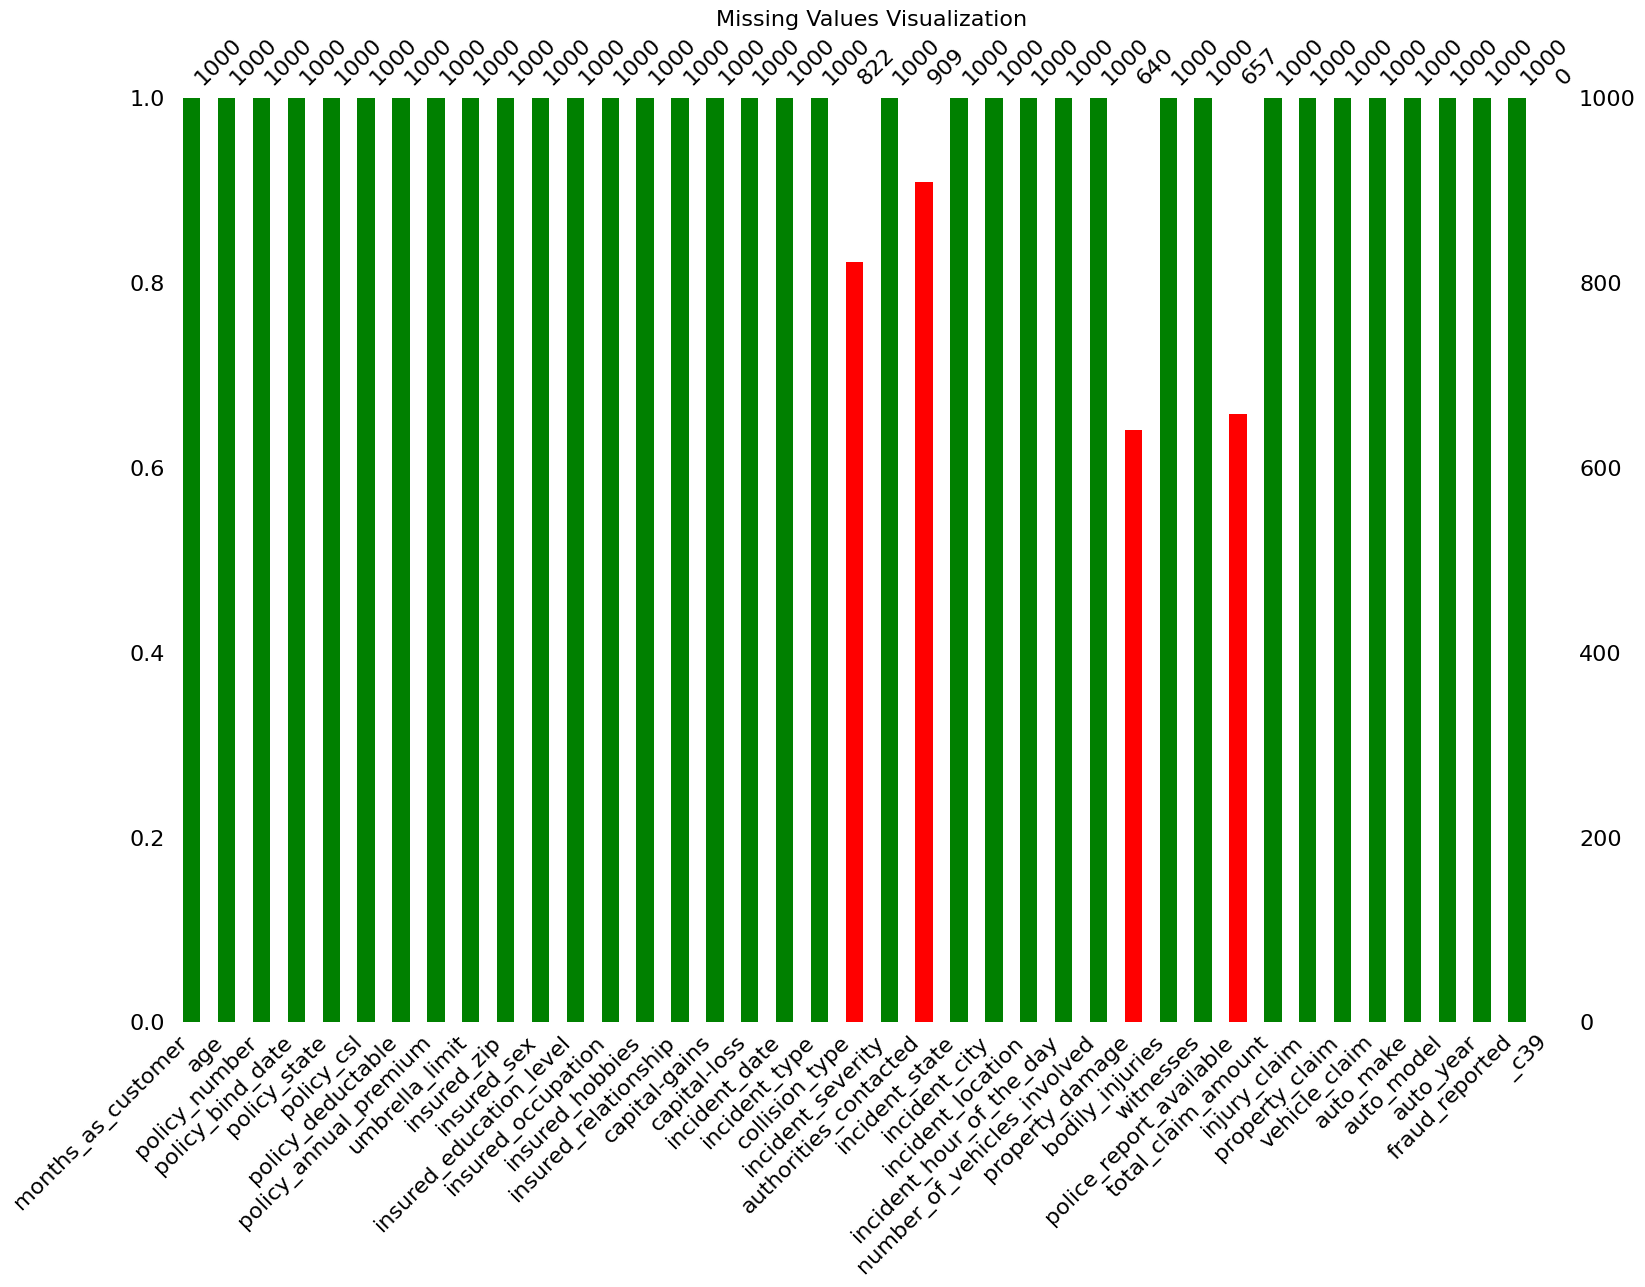

In [8]:
# Create the missingness bar plot
fig, ax = plt.subplots(figsize=(18, 12))
missing_data = data.isnull().sum()  # Calculate missing values for each column

# Set bar colors: red for columns with missing values, green for columns without missing values
colors = ['red' if count > 0 else 'green' for count in missing_data]

# Plotting missing values bar chart
msno.bar(data, color=colors, ax=ax)
ax.set_title("Missing Values Visualization", fontsize=16)
plt.show()

*Filling the missing values with Mean and Mode of their respective columns*

In [9]:
# Fill NaN with mode for specified columns
columns_to_fill = ["police_report_available", "property_damage", "collision_type", "authorities_contacted"]

for column in columns_to_fill:
    # Calculate mode and create a dictionary for updating values
    mode_value = data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)  # Use the assignment method

# Display the updated DataFrame
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available           0
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
auto_make                         0
auto_model                        0
auto_year                         0
fraud_reported                    0
_c39                           1000
dtype: int64

*Checking if the changes have been effected*

In [10]:
# Create the missingness bar plot
fig, ax = plt.subplots(figsize=(18, 12))
missing_data = data.isnull().sum()  # Calculate missing values for each column

# Set bar colors: red for columns with missing values, green for columns without missing values
colors = ['red' if count > 0 else 'green' for count in missing_data]

# Plot the missingness bar chart
msno.bar(data, color=colors, ax=ax)
ax.set_title("Missing Values Visualization", fontsize=16)
plt.show()

*Coverting date columns to appropriate datatype(DateTime)*

In [11]:
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data['incident_date'] = pd.to_datetime(data['incident_date'])

*Dropping Irrelevant Columns*

In [12]:
from tabulate import tabulate


columns_to_drop = ['incident_state', 'incident_city', 'incident_location', 'insured_zip', '_c39']

# Drop the columns
data = data.drop(columns=columns_to_drop)

# Assuming 'data' is your DataFrame
# Split the columns into two halves
midpoint = len(data.columns) // 2
columns_left = data.columns[:midpoint]
columns_right = data.columns[midpoint:]

# Create a table with two halves displayed side by side
columns_table = []
max_rows = max(len(columns_left), len(columns_right))
for i in range(max_rows):
    left_col = columns_left[i] if i < len(columns_left) else ""
    right_col = columns_right[i] if i < len(columns_right) else ""
    columns_table.append([i + 1, left_col, i + midpoint + 1, right_col])

# Print the columns in a side-by-side format
print(tabulate(columns_table, headers=["Index (Left)", "Column Name (Left)", "Index (Right)", "Column Name (Right)"], tablefmt="grid"))


+----------------+-------------------------+-----------------+-----------------------------+
|   Index (Left) | Column Name (Left)      |   Index (Right) | Column Name (Right)         |
+================+=========================+=================+=============================+
|              1 | months_as_customer      |              18 | incident_type               |
+----------------+-------------------------+-----------------+-----------------------------+
|              2 | age                     |              19 | collision_type              |
+----------------+-------------------------+-----------------+-----------------------------+
|              3 | policy_number           |              20 | incident_severity           |
+----------------+-------------------------+-----------------+-----------------------------+
|              4 | policy_bind_date        |              21 | authorities_contacted       |
+----------------+-------------------------+-----------------+--------

**UNIVARIATE ANALYSIS**

In [13]:
# List of columns to plot and their respective colors
columns_to_plot = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']
colors = ['skyblue', 'orange', 'green', 'purple']  # Unique colors for each histogram

# Create a figure with subplots
plt.figure(figsize=(14, 10))

# Loop through each column and create a histogram
for i, (column, color) in enumerate(zip(columns_to_plot, colors), 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    plt.hist(data[column], bins=30, color=color, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()

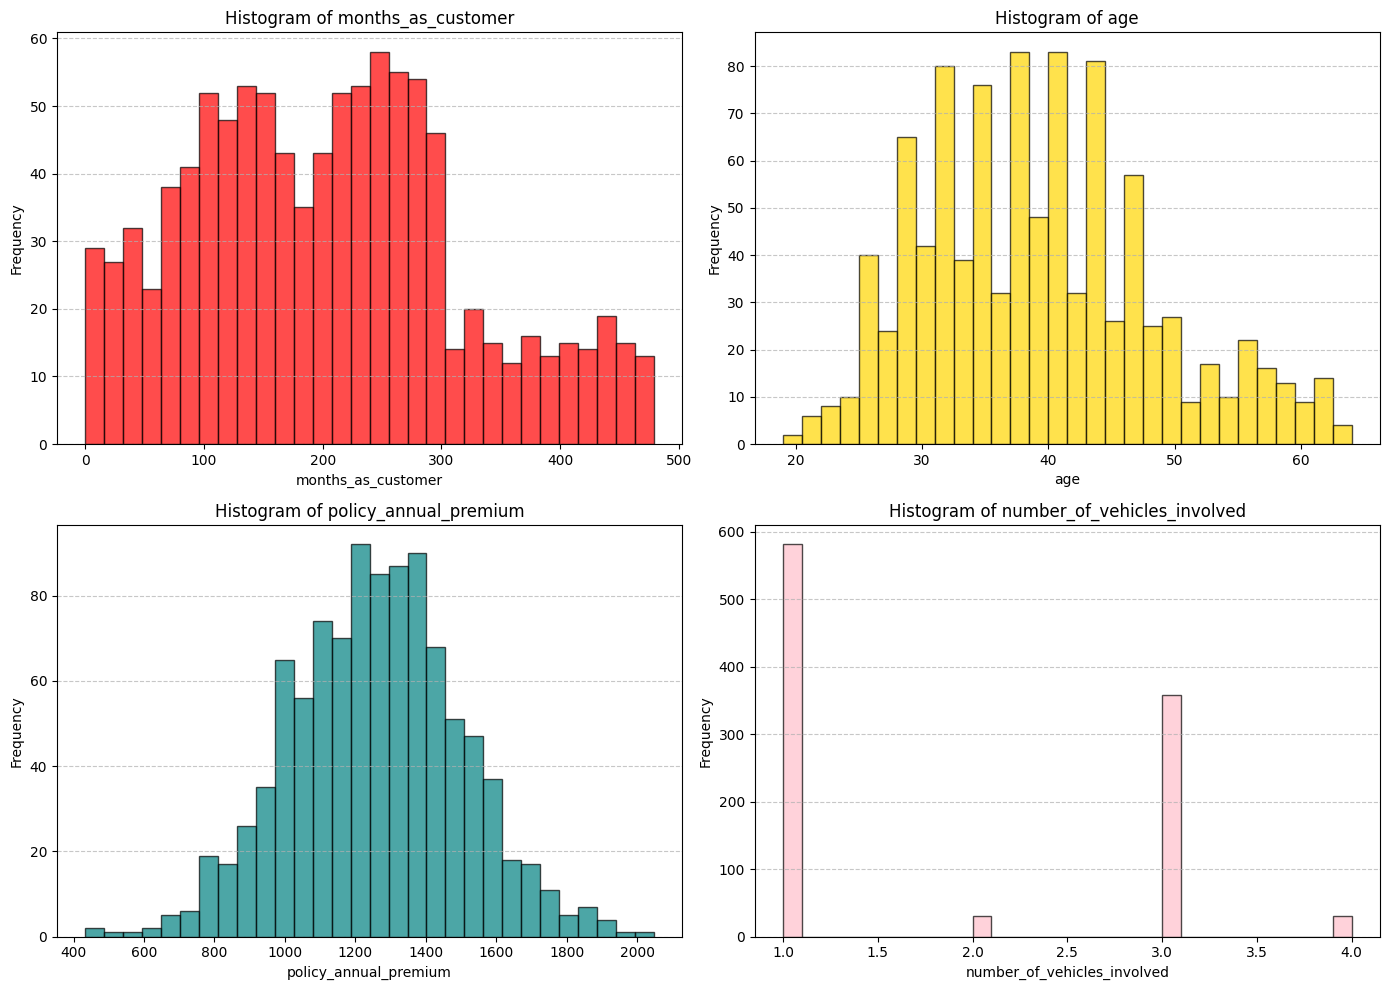

In [14]:
import matplotlib.pyplot as plt

# List of columns to plot and their respective unique colors
columns_to_plot = ['months_as_customer', 'age', 'policy_annual_premium', 'number_of_vehicles_involved']
colors = ['red', 'gold', 'teal', 'pink']  # Unique colors for each histogram

# Create a figure with subplots
plt.figure(figsize=(14, 10))

# Loop through each column and create a histogram
for i, (column, color) in enumerate(zip(columns_to_plot, colors), 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    plt.hist(data[column], bins=30, color=color, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
#List of columns to plot and their respective unique colors
columns_to_plot = ['fraud_reported', 'insured_sex', 'insured_education_level', 'insured_occupation']
colors = ['gold', 'teal', 'salmon', 'darkorange']  # Unique colors for each bar chart

#Create a figure with subplots
plt.figure(figsize=(16, 12))

#Loop through each column and create a bar chart
for i, (column, color) in enumerate(zip(columns_to_plot, colors), 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    value_counts = data[column].value_counts()
    total = value_counts.sum()

    bars = plt.bar(value_counts.index, value_counts.values, color=color, edgecolor='black', alpha=0.8)
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    #Add percentage labels on top of bars (small font)
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total) * 100
        plt.text(bar.get_x() + bar.get_width()/2, height + total * 0.01,  # slightly above the bar
                 f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

#Adjust layout for better spacing
plt.tight_layout()

#Show the plots
plt.show()

*DESCRIPTIVE STATISTICS OF NUMERICAL VARIABLES*

In [16]:
from tabulate import tabulate

# Ensure only numeric columns are used (exclude categorical/text columns)
numeric_data = data.select_dtypes(include=[np.number])

# Generate summary statistics
summary_stats = numeric_data.describe().T  # Transpose for better readability

# Add Range (Max - Min)
summary_stats['Range'] = summary_stats['max'] - summary_stats['min']

# Add Variance (skip NaNs)
summary_stats['Variance'] = numeric_data.var()

# Add Standard Deviation (already included in describe(), but ensuring consistency)
summary_stats['Std'] = numeric_data.std()

# Reorder columns: place the specified ones first
desired_order = [
    'months_as_customer', 'age', 'total_claim_amount',
    'number_of_vehicles_involved', 'vehicle_claim',
    'capital-loss', 'capital-gains'
]

# Keep only numeric columns in the desired order
desired_order = [col for col in desired_order if col in summary_stats.index]

# Append remaining columns that were not explicitly ordered
remaining_cols = [col for col in summary_stats.index if col not in desired_order]
final_order = desired_order + remaining_cols

# Reorder DataFrame
summary_stats = summary_stats.loc[final_order]

# Display the summary statistics
print("Enhanced Summary Statistics for Numerical Columns:")
print(tabulate(summary_stats, headers='keys', tablefmt='plain', numalign='right', stralign='center'))

Enhanced Summary Statistics for Numerical Columns:
                               count       mean          std      min      25%     50%      75%      max    Range     Variance          Std
    months_as_customer          1000    203.954      115.113        0   115.75   199.5   276.25      479      479        13251      115.113
            age                 1000     38.948      9.14029       19       32      38       44       64       45      83.5448      9.14029
    total_claim_amount          1000    52761.9      26401.5      100  41812.5   58055  70592.5   114920   114820  6.97041e+08      26401.5
number_of_vehicles_involved     1000      1.839      1.01888        1        1       1        3        4        3      1.03812      1.01888
       vehicle_claim            1000    37928.9      18886.3       70  30292.5   42100  50822.5    79560    79490  3.56691e+08      18886.3
       capital-loss             1000   -26793.7      28104.1  -111100   -51500  -23250        0        0   11

*PERCENTAGE OF CATEGORICAL VARIABLES*

In [17]:
# List of categorical columns from your dataset
categorical_columns = ['policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

# Iterate over each categorical column
for col in categorical_columns:
    print(f"\n{col} - Counts and Percentages:")

    # Get value counts and percentages
    count_data = data[col].value_counts()
    percentage_data = data[col].value_counts(normalize=True) * 100

    # Prepare data for tabulation
    table_data = []
    for category, count in count_data.items():
        percentage = percentage_data[category]
        table_data.append([category, count, f"{percentage:.2f}%"])

    # Print the table for the current column with a grid
    headers = ['Category', 'Count', 'Percentage']
    print(tabulate(table_data, headers=headers, tablefmt='grid', numalign='right', stralign='center'))


policy_csl - Counts and Percentages:
+------------+---------+--------------+
|  Category  |   Count |  Percentage  |
+============+=========+==============+
|  250/500   |     351 |    35.10%    |
+------------+---------+--------------+
|  100/300   |     349 |    34.90%    |
+------------+---------+--------------+
|  500/1000  |     300 |    30.00%    |
+------------+---------+--------------+

insured_sex - Counts and Percentages:
+------------+---------+--------------+
|  Category  |   Count |  Percentage  |
+============+=========+==============+
|   FEMALE   |     537 |    53.70%    |
+------------+---------+--------------+
|    MALE    |     463 |    46.30%    |
+------------+---------+--------------+

insured_education_level - Counts and Percentages:
+-------------+---------+--------------+
|  Category   |   Count |  Percentage  |
+=============+=========+==============+
|     JD      |     161 |    16.10%    |
+-------------+---------+--------------+
| High School |     160 |  

**EXPLORATORY DATA ANALYSIS (EDA) MULTIVARIATE**

*Time based analysis*

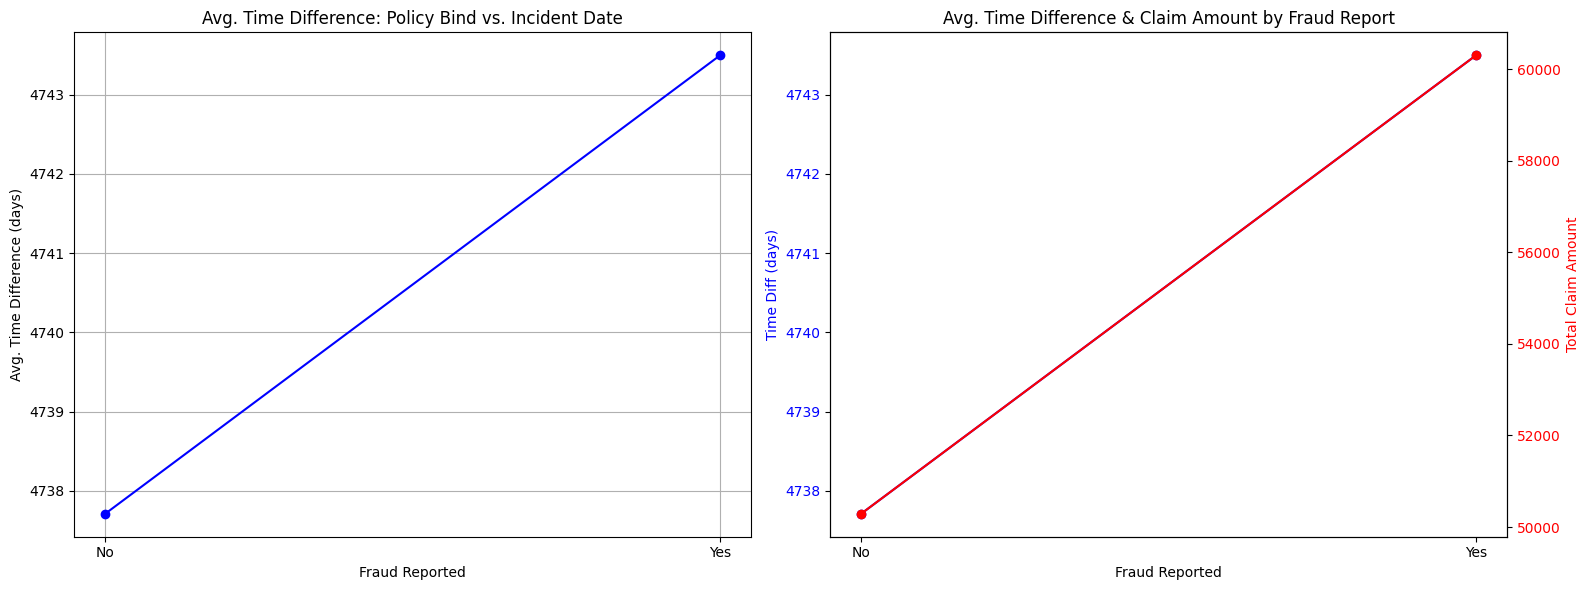

In [18]:
# Calculate the time difference in days
data['time_difference'] = (data['incident_date'] - data['policy_bind_date']).dt.days

# Group by 'fraud_reported' for both metrics
grouped_data = data.groupby('fraud_reported').agg({
    'time_difference': 'mean',
    'total_claim_amount': 'mean'
}).reset_index()

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Average Time Difference Line Chart ---
ax1.plot(grouped_data['fraud_reported'], grouped_data['time_difference'], marker='o', color='blue')
ax1.set_title('Avg. Time Difference: Policy Bind vs. Incident Date')
ax1.set_xlabel('Fraud Reported')
ax1.set_ylabel('Avg. Time Difference (days)')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['No', 'Yes'])
ax1.grid(True)

# --- Plot 2: Dual Axis Chart for Time Diff & Total Claim ---
ax2.set_title('Avg. Time Difference & Claim Amount by Fraud Report')
ax2.plot(grouped_data['fraud_reported'], grouped_data['time_difference'], marker='o', label='Time Diff (days)', color='blue')
ax2.set_xlabel('Fraud Reported')
ax2.set_ylabel('Time Diff (days)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['No', 'Yes'])

# Secondary y-axis for claim amount
ax2b = ax2.twinx()
ax2b.plot(grouped_data['fraud_reported'], grouped_data['total_claim_amount'], marker='o', label='Claim Amount', color='red')
ax2b.set_ylabel('Total Claim Amount', color='red')
ax2b.tick_params(axis='y', labelcolor='red')

# Adjust layout
fig.tight_layout()
plt.show()

In [19]:
print(data.columns)


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'time_difference'],
      dtype='object')


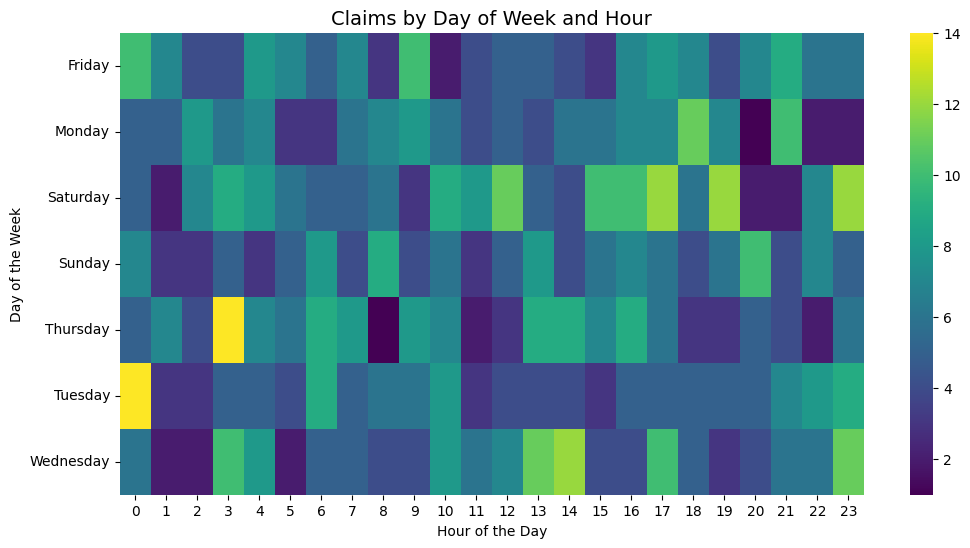

In [20]:
#PLOTTING CLAIM FREQUENCY HEATMAP
# Extract day of week and hour from incident date
data['incident_date'] = pd.to_datetime(data['incident_date'])
data['day_of_week'] = data['incident_date'].dt.day_name()
data['hour'] = data['incident_hour_of_the_day']

# Pivot table for heatmap
heatmap_data = data.pivot_table(index='day_of_week', columns='hour', values='fraud_reported', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="viridis", annot=False, cbar=True)
plt.title("Claims by Day of Week and Hour", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


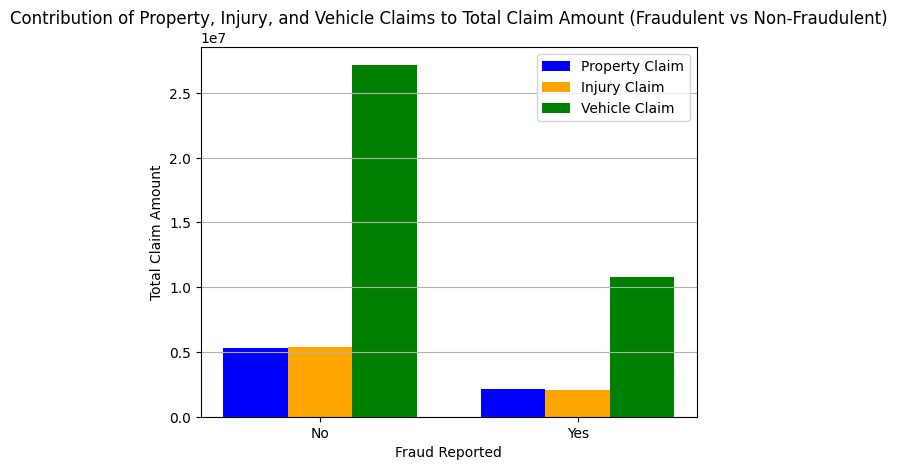

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the relevant columns

# Replace NaN with 0 if any in the claims columns
data['property_claim'] = data['property_claim'].fillna(0)
data['injury_claim'] = data['injury_claim'].fillna(0)
data['vehicle_claim'] = data['vehicle_claim'].fillna(0)

# Group the data by 'fraud_reported' and calculate the sum of each claim type
grouped_data = data.groupby('fraud_reported')[['property_claim', 'injury_claim', 'vehicle_claim']].sum()

# Plotting side-by-side bar chart
x = [0, 1]  # Fraud Reported categories (0 = No, 1 = Yes)
width = 0.25  # Width of each bar
labels = ['No', 'Yes']

# Positions for each bar
x_property = [pos - width for pos in x]
x_injury = x
x_vehicle = [pos + width for pos in x]

# Plot each claim type
plt.bar(x_property, grouped_data['property_claim'], width=width, label='Property Claim', color='blue')
plt.bar(x_injury, grouped_data['injury_claim'], width=width, label='Injury Claim', color='orange')
plt.bar(x_vehicle, grouped_data['vehicle_claim'], width=width, label='Vehicle Claim', color='green')

# Customize the chart
plt.title('Contribution of Property, Injury, and Vehicle Claims to Total Claim Amount (Fraudulent vs Non-Fraudulent)')
plt.xlabel('Fraud Reported')
plt.ylabel('Total Claim Amount')
plt.xticks(ticks=x, labels=labels)
plt.legend()
plt.grid(True, axis='y')

# Show the plot
plt.show()

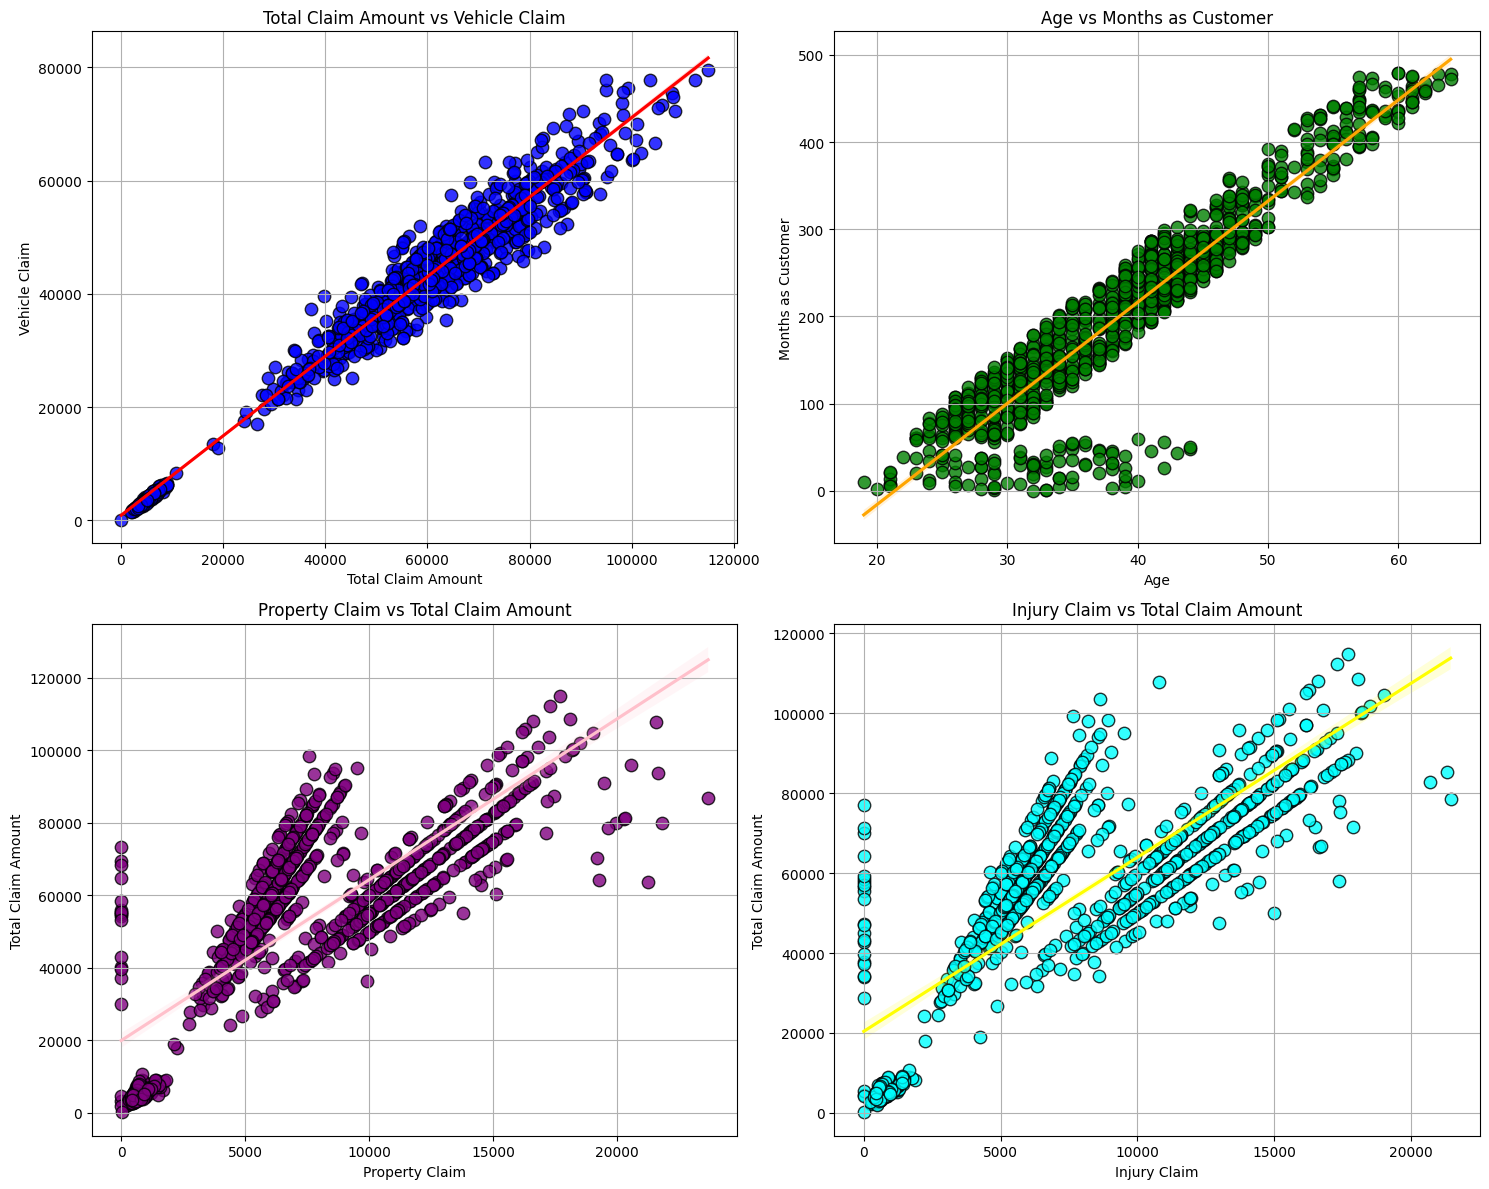

In [22]:
# Set up the figure
plt.figure(figsize=(15, 12))

# Scatter plot 1: total_claim_amount vs vehicle_claim
plt.subplot(2, 2, 1)
sns.regplot(x='total_claim_amount', y='vehicle_claim', data=data,
            scatter_kws={'color': 'blue', 's': 80, 'edgecolor': 'black', 'linewidths': 1},
            line_kws={'color': 'red'})
plt.title('Total Claim Amount vs Vehicle Claim')
plt.xlabel('Total Claim Amount')
plt.ylabel('Vehicle Claim')
plt.grid(True)

# Scatter plot 2: age vs months_as_customer
plt.subplot(2, 2, 2)
sns.regplot(x='age', y='months_as_customer', data=data,
            scatter_kws={'color': 'green', 's': 80, 'edgecolor': 'black', 'linewidths': 1},
            line_kws={'color': 'orange'})
plt.title('Age vs Months as Customer')
plt.xlabel('Age')
plt.ylabel('Months as Customer')
plt.grid(True)

# Scatter plot 3: property_claim vs total_claim_amount
plt.subplot(2, 2, 3)
sns.regplot(x='property_claim', y='total_claim_amount', data=data,
            scatter_kws={'color': 'purple', 's': 80, 'edgecolor': 'black', 'linewidths': 1},
            line_kws={'color': 'pink'})
plt.title('Property Claim vs Total Claim Amount')
plt.xlabel('Property Claim')
plt.ylabel('Total Claim Amount')
plt.grid(True)

# Scatter plot 4: injury_claim vs total_claim_amount
plt.subplot(2, 2, 4)
sns.regplot(x='injury_claim', y='total_claim_amount', data=data,
            scatter_kws={'color': 'cyan', 's': 80, 'edgecolor': 'black', 'linewidths': 1},
            line_kws={'color': 'yellow'})
plt.title('Injury Claim vs Total Claim Amount')
plt.xlabel('Injury Claim')
plt.ylabel('Total Claim Amount')
plt.grid(True)

# Adjust layout to ensure there's no overlap
plt.tight_layout()
plt.show()

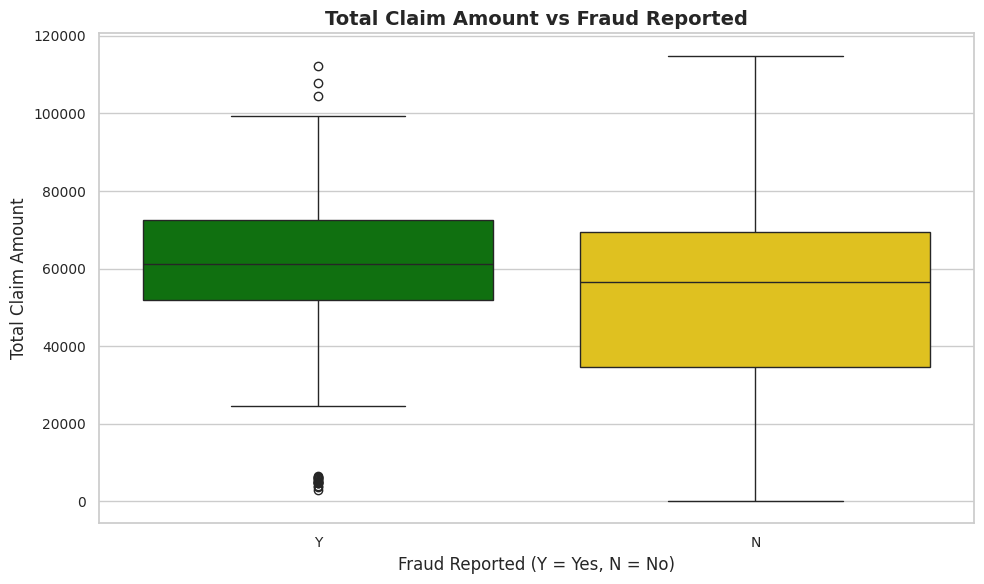

In [23]:
# Set the plot style
sns.set(style="whitegrid")

# Define a custom color palette
custom_palette = {'Y': 'green', 'N': 'gold'}  # Vibrant coral for 'Y', soft blue for 'N'

# Create a boxplot with hue
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='fraud_reported', y='total_claim_amount', hue='fraud_reported', palette=custom_palette, dodge=False)

# Add plot labels and title
plt.title('Total Claim Amount vs Fraud Reported', fontsize=14, fontweight='bold')
plt.xlabel('Fraud Reported (Y = Yes, N = No)', fontsize=12)
plt.ylabel('Total Claim Amount', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove the legend since hue and x are the same
plt.legend([], [], frameon=False)

# Enhance aesthetics with tight layout
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# Set the plot style
sns.set(style="whitegrid")

# Define a custom color palette for fraud reported
custom_palette = {'Y': 'red', 'N': 'lightblue'}  # Coral for 'Y', Blue for 'N'

# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='incident_type', hue='fraud_reported', palette=custom_palette)

# Calculate counts and percentages
total_count = len(data)
for p in ax.patches:
    height = p.get_height()
    # Calculate percentage
    percentage = (height / total_count) * 100
    # Add the count and percentage on top of the bars
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontsize=9, color='black')

# Add labels and title
plt.title('Incident Type vs Fraud Reported', fontsize=14, fontweight='bold')
plt.xlabel('Incident Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.legend(title='Fraud Reported', fontsize=10, title_fontsize=12)

# Enhance aesthetics with tight layout
plt.tight_layout()

# Show the plot
plt.show()

***Relationship Between Claim Amounts and Incident Severity***

In [25]:
sns.boxplot(x='incident_severity', y='total_claim_amount', hue='fraud_reported', data=data)
plt.title("Claim Amount by Incident Severity")
plt.xlabel("Incident Severity")
plt.ylabel("Total Claim Amount")
plt.xticks(rotation=45)
plt.legend(title="Fraud Reported")
plt.show()


***Fraud and other variables***

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the relevant columns

# Filter for fraud cases using 'Y'
fraud_cases = data[data['fraud_reported'] == 'Y']

# Check if there are any fraud cases
if fraud_cases.empty:
    print("No fraud cases found in the data.")
else:
    # Create a 2x2 subplot layout
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Adjust bar width to make bars thinner
    bar_width = 0.6

    # Bar Chart: Fraud by `insured_occupation`
    fraud_by_occupation = fraud_cases.groupby('insured_occupation')['fraud_reported'].count()
    if not fraud_by_occupation.empty:
        axes[0, 0].bar(fraud_by_occupation.index, fraud_by_occupation.sort_values(ascending=False),
                       color='royalblue', edgecolor='black', width=bar_width)
        axes[0, 0].set_title('Fraud Cases by Insured Occupation', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Insured Occupation')
        axes[0, 0].set_ylabel('Number of Fraud Cases')
        axes[0, 0].tick_params(axis='x', rotation=90, labelsize=10)  # Reduce font size
        axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # Bar Chart: Fraud by `insured_hobbies`
    fraud_by_hobbies = fraud_cases.groupby('insured_hobbies')['fraud_reported'].count()
    if not fraud_by_hobbies.empty:
        axes[0, 1].bar(fraud_by_hobbies.index, fraud_by_hobbies.sort_values(ascending=False),
                       color='tomato', edgecolor='black', width=bar_width)
        axes[0, 1].set_title('Fraud Cases by Insured Hobbies', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Insured Hobbies')
        axes[0, 1].set_ylabel('Number of Fraud Cases')
        axes[0, 1].tick_params(axis='x', rotation=90, labelsize=10)  # Reduce font size
        axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

    # Bar Chart: Fraud by `incident_severity`
    fraud_by_severity = fraud_cases.groupby('incident_severity')['fraud_reported'].count()
    if not fraud_by_severity.empty:
        axes[1, 0].bar(fraud_by_severity.index, fraud_by_severity.sort_values(ascending=False),
                       color='darkorange', edgecolor='black', width=bar_width)
        axes[1, 0].set_title('Fraud Cases by Incident Severity', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Incident Severity')
        axes[1, 0].set_ylabel('Number of Fraud Cases')
        axes[1, 0].tick_params(axis='x', rotation=45, labelsize=10)
        axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # Bar Chart: Fraud by `number_of_vehicles_involved`
    fraud_by_vehicles = fraud_cases.groupby('number_of_vehicles_involved')['fraud_reported'].count()
    if not fraud_by_vehicles.empty:
        axes[1, 1].bar(fraud_by_vehicles.index.astype(str), fraud_by_vehicles.sort_values(ascending=False),
                       color='darkviolet', edgecolor='black', width=bar_width)
        axes[1, 1].set_title('Fraud Cases by Number of Vehicles Involved', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Number of Vehicles Involved')
        axes[1, 1].set_ylabel('Number of Fraud Cases')
        axes[1, 1].tick_params(axis='x', rotation=0, labelsize=10)
        axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: `capital-gains` vs. `capital-loss`, colored by `fraud_reported`
plt.figure(figsize=(10, 6))

# Use seaborn's scatterplot for the points
sns.scatterplot(
    data=data,
    x='capital-gains',
    y='capital-loss',
    hue='fraud_reported',  # Color by fraud status ('Y' or 'N')
    palette={'Y': 'red', 'N': 'green'},  # Red for fraud, green for non-fraud
    alpha=0.7,  # Transparency for overlapping points
    s=50  # Reduced size of the points
)

# Add a regression line for the entire dataset
sns.regplot(
    data=data,
    x='capital-gains',
    y='capital-loss',
    scatter=False,  # Only show the regression line
    color='black',  # Black regression line
    line_kws={'label': 'Regression Line'}  # Add label for the regression line
)

# Set y-axis (capital-loss) and x-axis (capital-gains) limits to start from the lowest value
plt.ylim(data['capital-loss'].min() - 100, data['capital-loss'].max() + 100)  # Adjust y-axis (capital-loss)
plt.xlim(data['capital-gains'].min() - 100, data['capital-gains'].max() + 100)  # Adjust x-axis (capital-gains)

# Invert the y-axis so that the lowest values are at the bottom
plt.gca().invert_yaxis()

# Customize the plot
plt.title('Scatter Plot of Capital Gains vs. Capital Loss\nColored by Fraud Status with Regression Line')
plt.xlabel('Capital Gains')
plt.ylabel('Capital Loss')

# Add a grid with a cleaner look
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Manually handle the legend to ensure correct colors and entries
handles, labels = plt.gca().get_legend_handles_labels()

# Remove the legend entry for the regression line
handles = handles[:-1]
labels = labels[:-1]

# Add custom legend for fraud vs non-fraud
custom_labels = ['Non-Fraud', 'Fraud']
fraud_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
                 plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)]

# Add the regression line legend entry
handles.append(plt.Line2D([0], [0], color='black', lw=2))
labels.append('Regression Line')

# Add fraud vs non-fraud labels and the regression line label
plt.legend(handles=fraud_handles + handles, labels=custom_labels + labels, title='Fraud Reported')

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
#Distribution of Auto Year for Fraudulent and Non-Fraudulent Claims

# Filter data for fraudulent and non-fraudulent claims based on 'fraud_reported' column
fraudulent_claims = data[data['fraud_reported'] == 'Y']
non_fraudulent_claims = data[data['fraud_reported'] == 'N']

# Plot the distribution of 'auto_year' for fraudulent and non-fraudulent claims
plt.figure(figsize=(10, 6))

# Plot for fraudulent claims (Y) in red
sns.histplot(fraudulent_claims['auto_year'], color='blue', label='Fraudulent Claims (Y)', bins=20, kde=False)

# Plot for non-fraudulent claims (N) in purple
sns.histplot(non_fraudulent_claims['auto_year'], color='purple', label='Non-Fraudulent Claims (N)', bins=20, kde=False)

# Add labels and title
plt.title('Distribution of Auto Year for Fraudulent and Non-Fraudulent Claims')
plt.xlabel('Auto Year')
plt.ylabel('Frequency')
plt.legend(title='Fraud Reported')

# Show the plot
plt.tight_layout()
plt.show()

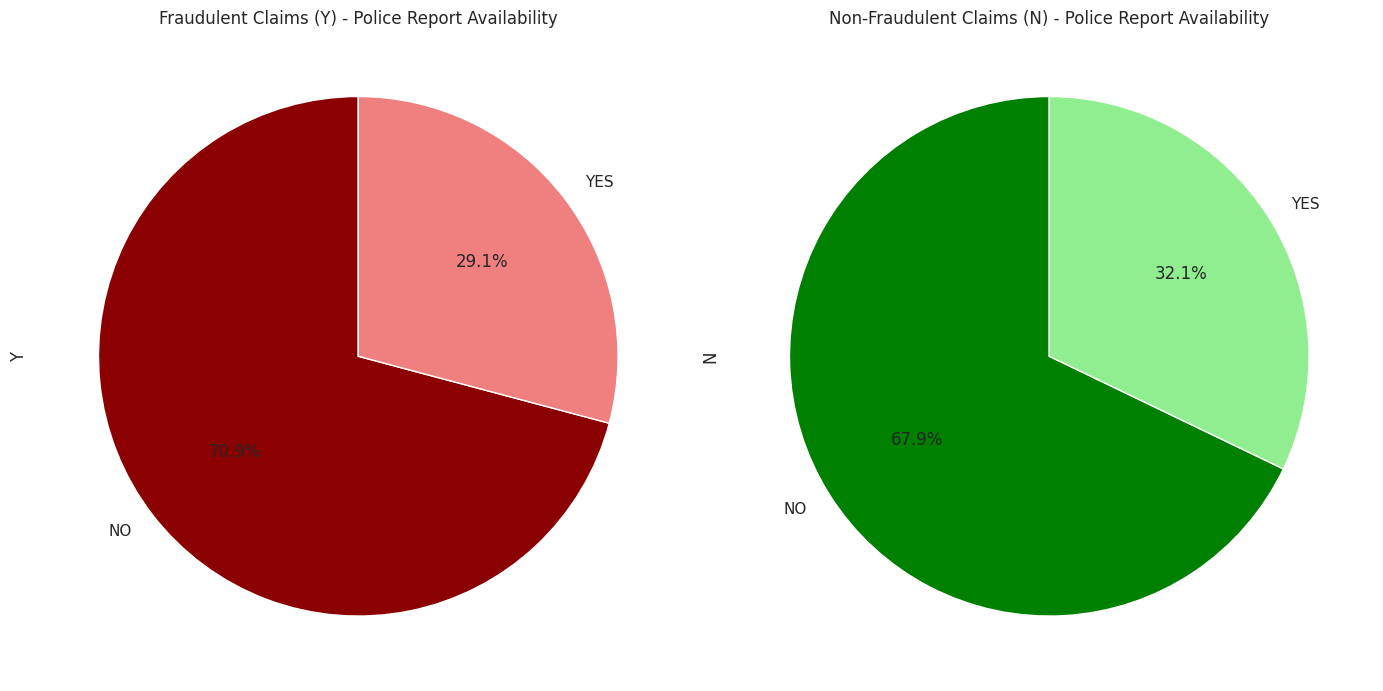

In [29]:
#Piechart distribution of police contacted after collision and it's relation to fraud

# Group by 'fraud_reported' and 'police_report_available', and count occurrences
fraud_police_report = data.groupby(['fraud_reported', 'police_report_available']).size().unstack(fill_value=0)

# Plot the pie chart for both fraud (Y) and non-fraud (N) claims
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot pie chart for fraudulent claims (Y)
fraud_police_report.loc['Y'].plot(kind='pie', ax=axes[0], autopct='%1.1f%%', colors=['darkred', 'lightcoral'], startangle=90, legend=False)
axes[0].set_title('Fraudulent Claims (Y) - Police Report Availability')

# Plot pie chart for non-fraudulent claims (N)
fraud_police_report.loc['N'].plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['green', 'lightgreen'], startangle=90, legend=False)
axes[1].set_title('Non-Fraudulent Claims (N) - Police Report Availability')

# Display the plot
plt.tight_layout()
plt.show()

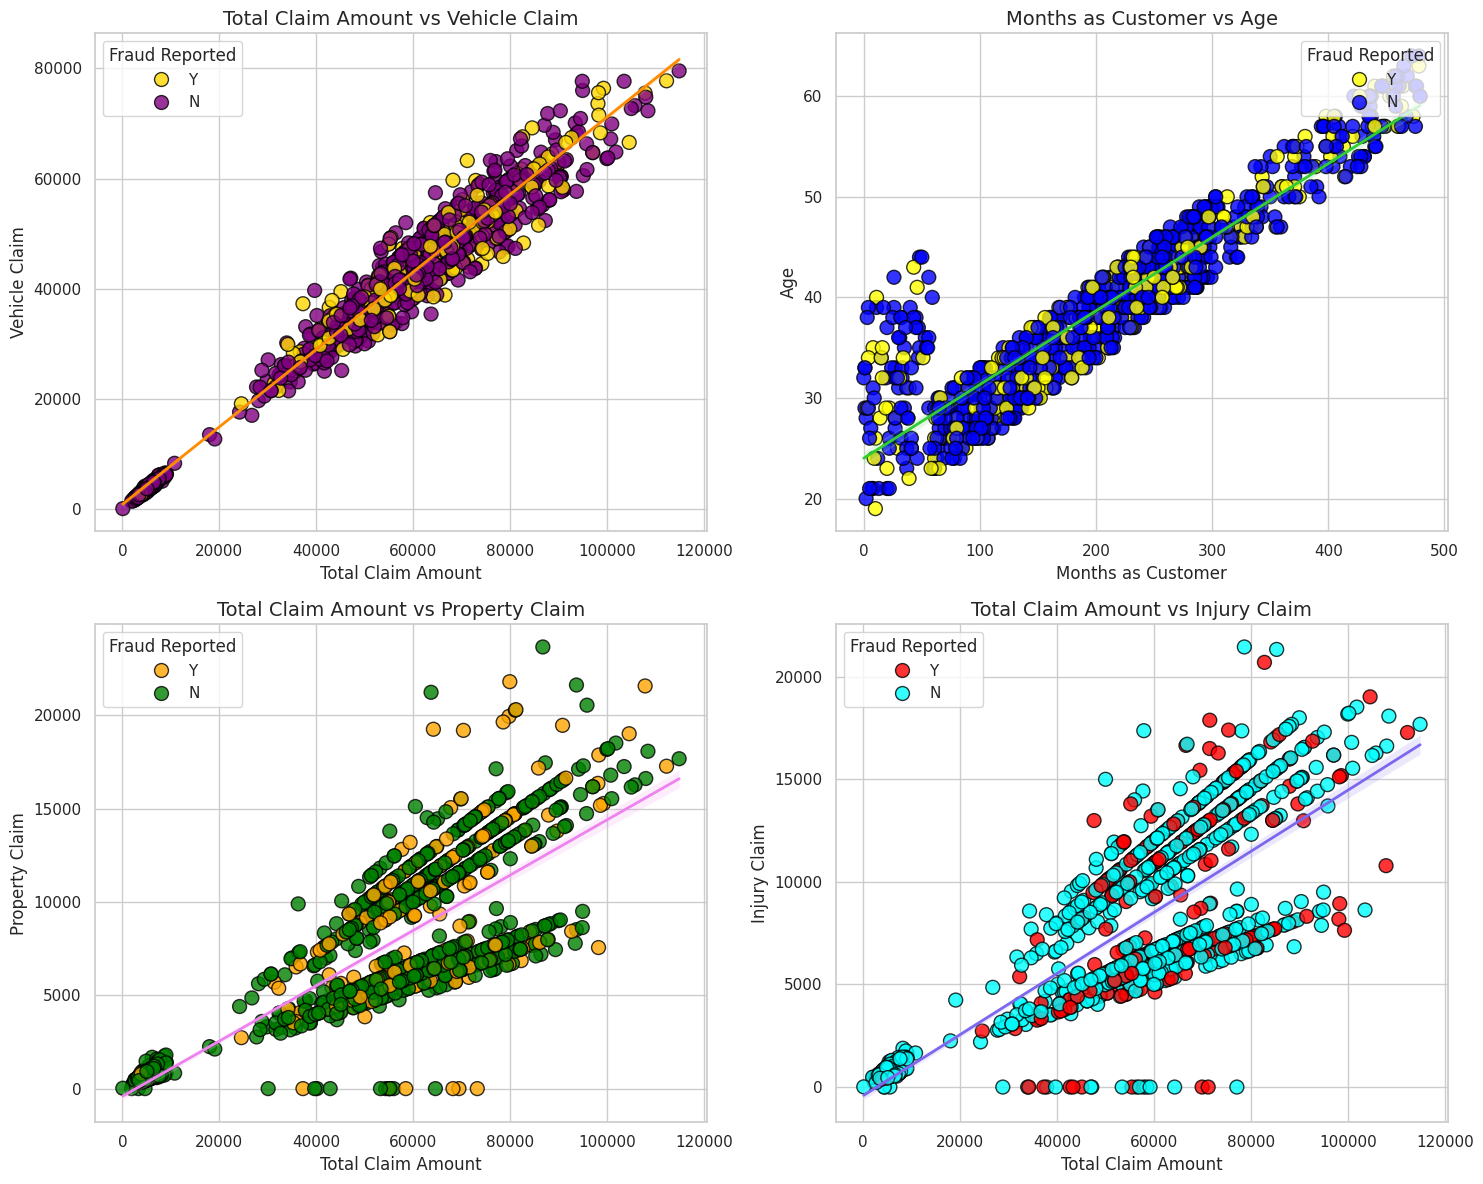

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(15, 12))

# Scatter plot 1: total_claim_amount vs vehicle_claim
plt.subplot(2, 2, 1)
sns.scatterplot(
    x='total_claim_amount',
    y='vehicle_claim',
    hue='fraud_reported',
    data=data,
    palette={'Y': 'gold', 'N': 'purple'},
    s=100, edgecolor='black', linewidth=1, alpha=0.8
)
sns.regplot(
    x='total_claim_amount',
    y='vehicle_claim',
    data=data,
    scatter=False,
    line_kws={'color': 'darkorange', 'linewidth': 2}
)
plt.title('Total Claim Amount vs Vehicle Claim', fontsize=14)
plt.xlabel('Total Claim Amount')
plt.ylabel('Vehicle Claim')
plt.grid(True)
plt.legend(title='Fraud Reported', loc='upper left')

# Scatter plot 2: age vs months_as_customer
plt.subplot(2, 2, 2)
sns.scatterplot(
    x='months_as_customer',
    y='age',
    hue='fraud_reported',
    data=data,
    palette={'Y': 'yellow', 'N': 'blue'},
    s=100, edgecolor='black', linewidth=1, alpha=0.8
)
sns.regplot(
   x='months_as_customer',
    y='age',
    data=data,
    scatter=False,
    line_kws={'color': 'limegreen', 'linewidth': 2}
)
plt.title('Months as Customer vs Age', fontsize=14)
plt.xlabel('Months as Customer')
plt.ylabel('Age')
plt.grid(True)
plt.legend(title='Fraud Reported', loc='upper right')

# Scatter plot 3: property_claim vs total_claim_amount
plt.subplot(2, 2, 3)
sns.scatterplot(
    x='total_claim_amount',
    y='property_claim',
    hue='fraud_reported',
    data=data,
    palette={'Y': 'orange', 'N': 'green'},
    s=100, edgecolor='black', linewidth=1, alpha=0.8
)
sns.regplot(
    x='total_claim_amount',
    y='property_claim',
    data=data,
    scatter=False,
    line_kws={'color': 'violet', 'linewidth': 2}
)
plt.title('Total Claim Amount vs Property Claim', fontsize=14)
plt.xlabel('Total Claim Amount')
plt.ylabel('Property Claim')
plt.grid(True)
plt.legend(title='Fraud Reported', loc='upper left')

# Scatter plot 4: injury_claim vs total_claim_amount
plt.subplot(2, 2, 4)
sns.scatterplot(
    x='total_claim_amount',
    y='injury_claim',
    hue='fraud_reported',
    data=data,
    palette={'Y': 'red', 'N': 'cyan'},
    s=100, edgecolor='black', linewidth=1, alpha=0.8
)
sns.regplot(
    x='total_claim_amount',
    y='injury_claim',
    data=data,
    scatter=False,
    line_kws={'color': 'mediumslateblue', 'linewidth': 2}
)
plt.title('Total Claim Amount vs Injury Claim', fontsize=14)
plt.xlabel('Total Claim Amount')
plt.ylabel('Injury Claim')
plt.grid(True)
plt.legend(title='Fraud Reported', loc='upper left')

# Adjust layout to ensure there's no overlap
plt.tight_layout()
plt.show()

***Correlation Analysis between variables in the dataset***

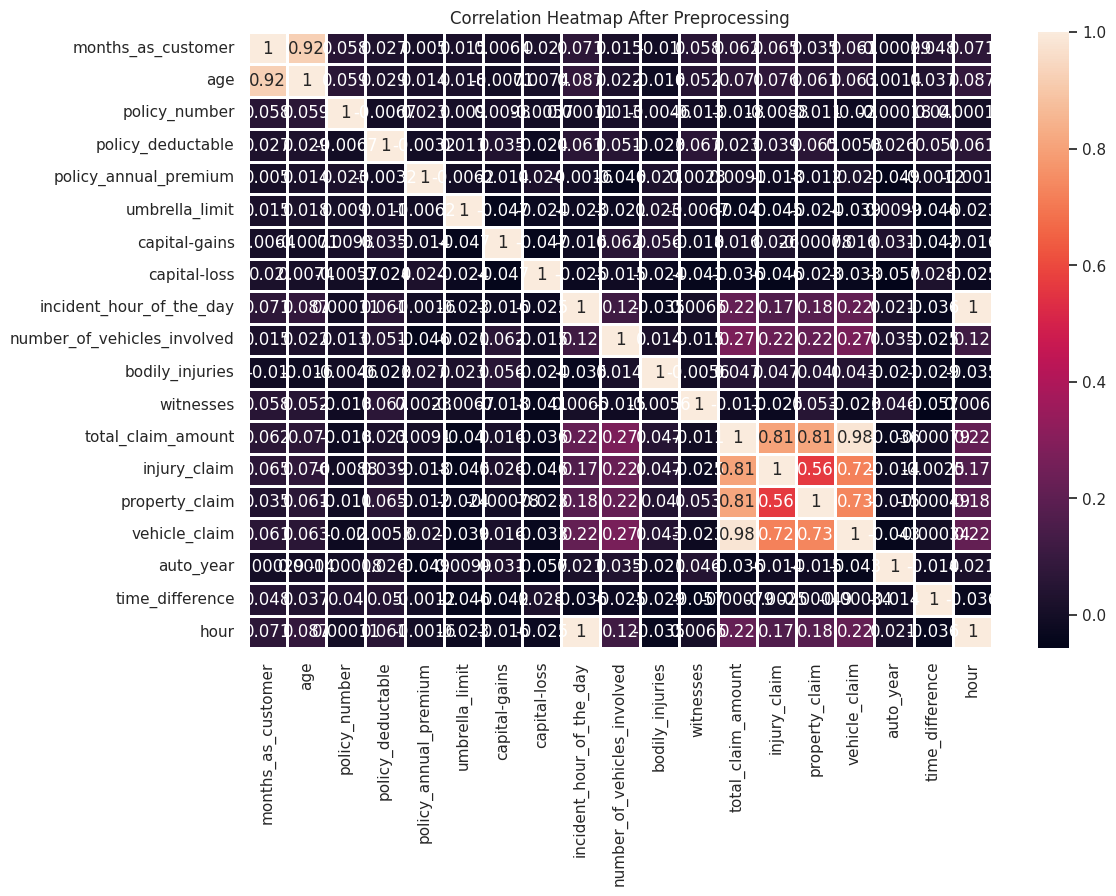

In [31]:
# Convert 'policy_bind_date' to datetime and extract the year
data['policy_bind_year'] = pd.to_datetime(data['policy_bind_date'], errors='coerce').dt.year

# Drop the original date column
data.drop('policy_bind_date', axis=1, inplace=True)

# Recompute the correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidths=1)
plt.title("Correlation Heatmap After Preprocessing")
plt.show()

*Statistical Testing*

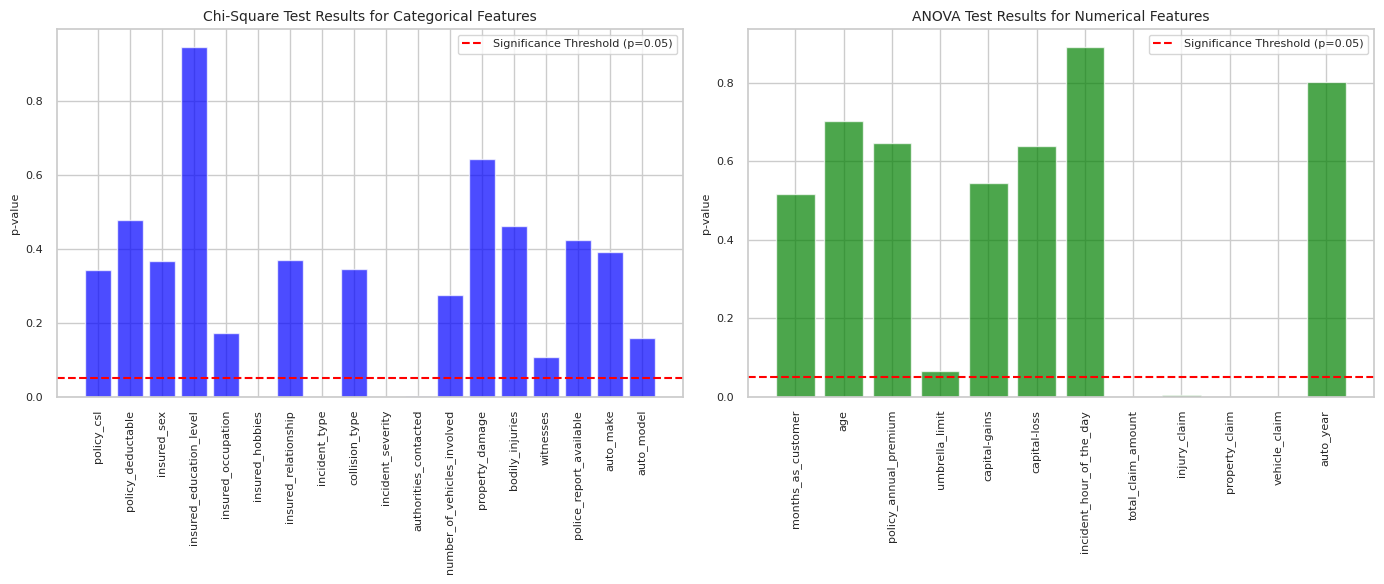

In [32]:
from scipy.stats import chi2_contingency, f_oneway

# Define the target variable
target = 'fraud_reported'

# Define the list of features for analysis
features = ['months_as_customer', 'age', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
            'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship',
            'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage',
            'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim',
            'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year']

# Function to perform Chi-Square and ANOVA tests
def analyze_features_and_plot(data, features, target):
    results = []

    for feature in features:
        # Check if the feature is categorical or numerical
        if data[feature].dtype == 'object' or len(data[feature].unique()) <= 10:  # Categorical
            contingency_table = pd.crosstab(data[feature], data[target])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            results.append({'Feature': feature, 'Test': 'Chi-Square', 'p-value': p, 'Significant': p < 0.05})
        else:  # Numerical
            groups = [data[data[target] == val][feature].dropna() for val in data[target].unique()]
            f_stat, p = f_oneway(*groups)
            results.append({'Feature': feature, 'Test': 'ANOVA', 'p-value': p, 'Significant': p < 0.05})

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Separate categorical and numerical results
    cat_results = results_df[results_df['Test'] == 'Chi-Square']
    num_results = results_df[results_df['Test'] == 'ANOVA']

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot Chi-Square test results
    axes[0].bar(cat_results['Feature'], cat_results['p-value'], color='blue', alpha=0.7)
    axes[0].axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')
    axes[0].set_title('Chi-Square Test Results for Categorical Features', fontsize=10)
    axes[0].set_ylabel('p-value', fontsize=8)
    axes[0].legend(fontsize=8)
    axes[0].grid(True)
    axes[0].tick_params(axis='x', rotation=90, labelsize=8)
    axes[0].tick_params(axis='y', labelsize=8)

    # Plot ANOVA test results
    axes[1].bar(num_results['Feature'], num_results['p-value'], color='green', alpha=0.7)
    axes[1].axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')
    axes[1].set_title('ANOVA Test Results for Numerical Features', fontsize=10)
    axes[1].set_ylabel('p-value', fontsize=8)
    axes[1].legend(fontsize=8)
    axes[1].grid(True)
    axes[1].tick_params(axis='x', rotation=90, labelsize=8)
    axes[1].tick_params(axis='y', labelsize=8)

    plt.tight_layout()
    plt.show()

    return results_df

# Run the analysis and visualize
results = analyze_features_and_plot(data, features, target)

**MACHINE LEARNING BEFORE SMOTE, FEATURE ENGINEERING AND SELECTION**

In [33]:
pip install xgboost

In [34]:
print(data.columns)


Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'time_difference', 'day_of_week', 'hour',
       'policy_bind_year'],
      dtype='object')


**FEATURE ENGINEERING**

In [35]:
#FEATURE ENGINEERING OF CORRELATED FEATURES


#Merge Claim Features (Strong Correlation)
data['combined_claims'] = data['total_claim_amount'] + data['injury_claim'] + data['property_claim'] + data['vehicle_claim']

#Encode Fraud Risk by Time of Incident
# Define high fraud risk periods
high_risk_hours = list(range(0, 6)) + list(range(22, 24))  # Nighttime fraud risk
high_risk_days = ['Saturday', 'Sunday']  # Weekend fraud risk

# Convert incident_date to datetime and extract day of week
data['incident_date'] = pd.to_datetime(data['incident_date'])
data['day_of_week'] = data['incident_date'].dt.day_name()

# Create fraud_risk_time_score
data['fraud_risk_time_score'] = np.where(
    (data['incident_hour_of_the_day'].isin(high_risk_hours)) |
    (data['day_of_week'].isin(high_risk_days)), 1, 0)

# 3️⃣ Combine `number_of_vehicles_involved` & `incident_severity` into a Risk Score
severity_mapping = {'Trivial Damage': 1, 'Minor Damage': 2, 'Major Damage': 3, 'Total Loss': 4}
data['incident_severity'] = data['incident_severity'].map(severity_mapping)
data['vehicle_severity_score'] = data['number_of_vehicles_involved'] * data['incident_severity']

# 4️⃣ Convert Categorical Features into Risk Scores
fraud_risk_mapping = {
    'incident_type': {'Single Vehicle Collision': 1, 'Multi-vehicle Collision': 2, 'Vehicle Theft': 3, 'Parked Car': 1},
    'authorities_contacted': {'None': 0, 'Police': 2, 'Fire': 3, 'Ambulance': 3, 'Other': 1},
}

for col, mapping in fraud_risk_mapping.items():
    data[col] = data[col].map(mapping)

# 5️⃣ One-Hot Encode Remaining Categorical Features
data = pd.get_dummies(data, columns=['insured_hobbies'], drop_first=True)

# 6️⃣ Drop Unnecessary Columns After Feature Engineering
drop_cols = ['policy_number', 'incident_date', 'auto_year']
data = data.drop(columns=drop_cols)

# Print Final Processed DataFrame
data.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_relationship  capital-gains  capital-loss  \
0       craft-repair              husband          53300             0   
1  machine-op-inspct       other-relative              0             0   
2              sales            own-child          35100             0   
3       armed-forces            unmarried          48900        -62400   
4              sales            unmarried          66000        -46000   

   incident_type   collision_type  incident_severity  authorities_contacted  \
0              1   Side Collision                  3                      2   
1              3   Rear Collision                  2                      2   
2              2   Rear Collision                  2                      2   
3              1  Front Collision                  3                      2   
4              3   Rear Collision                  2                      2   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

  fraud_reported  time_difference day_of_week  hour  policy_bind_year  \
0              Y              100      Sunday     5              2014   
1              Y             3130   Wednesday     8              2006   
2              N             5282      Sunday     7              2000   
3              Y             8996    Saturday     5              1990   
4              N              256     Tuesday    20              2014   

   combined_claims  fraud_risk_time_score  vehicle_severity_score  \
0           143220                      1                       3   
1            10140                      0                       2   
2            69300                      1                       6   
3           126800                      1                       3   
4            13000        

In [36]:
# Identify all one-hot encoded columns related to `insured_hobbies`
hobby_columns = [col for col in data.columns if col.startswith('insured_hobbies_')]

# Reconstruct `insured_hobbies` column
data['insured_hobbies'] = data[hobby_columns].idxmax(axis=1).str.replace('insured_hobbies_', '')

# Drop the one-hot encoded columns
data.drop(columns=hobby_columns, inplace=True)

# Print first few rows to verify
print(data[['insured_hobbies']].head())

  insured_hobbies
0        sleeping
1         reading
2     board-games
3     board-games
4     board-games


In [37]:
# Define the original column names before feature engineering
original_columns = [
    'months_as_customer', 'age', 'policy_state', 'policy_csl', 'policy_deductable',
    'policy_annual_premium', 'umbrella_limit', 'insured_sex', 'insured_education_level',
    'insured_occupation', 'insured_relationship', 'capital-gains', 'capital-loss',
    'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted',
    'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage',
    'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount',
    'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
    'fraud_reported'
]

# Define the newly created columns (excluding one-hot encoded features)
new_columns = [
    'combined_claims', 'day_of_week', 'fraud_risk_time_score', 'vehicle_severity_score'
]

# Identify the columns that were merged to create new features
merged_features = {
    'combined_claims': ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim'],
    'fraud_risk_time_score': ['incident_hour_of_the_day', 'day_of_week'],
    'vehicle_severity_score': ['incident_severity', 'number_of_vehicles_involved']
}

# Print the merged features
print("🔹 **Merged Features and Their Source Columns:**")
for new_col, merged_cols in merged_features.items():
    print(f"🟢 {new_col}: Merged from {', '.join(merged_cols)}")

# Print newly added columns
print("\n🔹 **Newly Created Feature Columns:**")
print(new_columns)

🔹 **Merged Features and Their Source Columns:**
🟢 combined_claims: Merged from total_claim_amount, injury_claim, property_claim, vehicle_claim
🟢 fraud_risk_time_score: Merged from incident_hour_of_the_day, day_of_week
🟢 vehicle_severity_score: Merged from incident_severity, number_of_vehicles_involved

🔹 **Newly Created Feature Columns:**
['combined_claims', 'day_of_week', 'fraud_risk_time_score', 'vehicle_severity_score']


**MACHINE LEARNING**

In [38]:
# Define target variable
y = data['fraud_reported'].map({'N': 0, 'Y': 1})  # Convert target variable to binary (0 = Non-Fraud, 1 = Fraud)

# Define feature matrix (exclude target column)
X = data.drop(columns=['fraud_reported'], errors='ignore')

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

*Dropping columns That were merged during feature engineering*

In [39]:
# Define merged columns to drop
merged_columns = [
    'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',  # Used in 'combined_claims'
    'incident_hour_of_the_day', 'day_of_week',  # Used in 'fraud_risk_time_score'
    'incident_severity', 'number_of_vehicles_involved'  # Used in 'vehicle_severity_score'
]

# Drop merged columns
X_train = X_train.drop(columns=merged_columns, errors='ignore')
X_test = X_test.drop(columns=merged_columns, errors='ignore')

In [40]:
# Drop the 'policy_state' column before any processing
data = data.drop(columns=['policy_state'])

*Converting Categorical Variables to Numerical*

In [41]:
# Select categorical columns that need encoding
categorical_columns = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
                       'insured_occupation', 'insured_relationship', 'incident_type',
                       'collision_type', 'authorities_contacted',
                       'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'insured_hobbies']

# Apply LabelEncoder to all categorical features in the dataset
label_encoder = LabelEncoder()

# Identify categorical columns (assuming you already know which ones)
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])

*Applying SMOTE To Balanace Data*

In [42]:

# Now apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"Class distribution after SMOTE: {y_train_balanced.value_counts()}")

Class distribution after SMOTE: fraud_reported
0    602
1    602
Name: count, dtype: int64


*Feature Importance using Random Forest*

<ipython-input-43-874b36a2a9aa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feature_importance["Importance"][:10], y=feature_importance["Feature"][:10], palette="coolwarm")


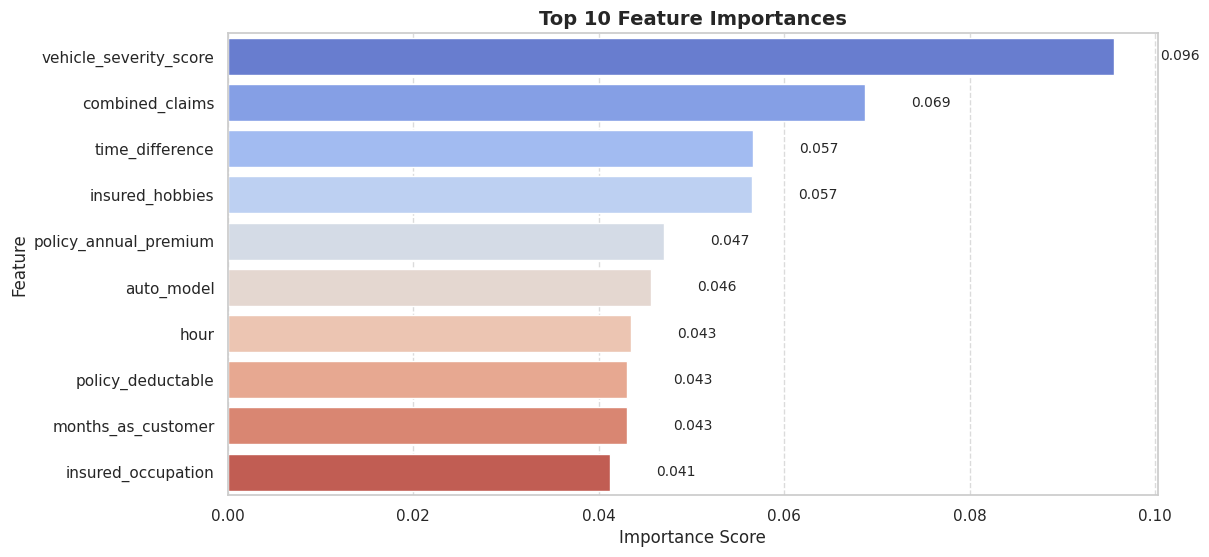

In [43]:
# Train a baseline Random Forest model to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Extract feature importance
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12,6))
ax = sns.barplot(x=feature_importance["Importance"][:10], y=feature_importance["Feature"][:10], palette="coolwarm")
plt.title("Top 10 Feature Importances", fontsize=14, fontweight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Display the feature importance scores on top of the bars
for i, v in enumerate(feature_importance["Importance"][:10]):
    ax.text(v + 0.005, i, f"{v:.3f}", va='center', ha='left', fontsize=10)

plt.show()

# Select top features for model training
top_features = feature_importance.head(10)["Feature"]
X_train_balanced = X_train_balanced[top_features]
X_test = X_test[top_features]

**MODEL TRAINING AND EVALUATION**

<ipython-input-44-26861d173af5>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Importance"][:10], y=feature_importance["Feature"][:10], palette="coolwarm")


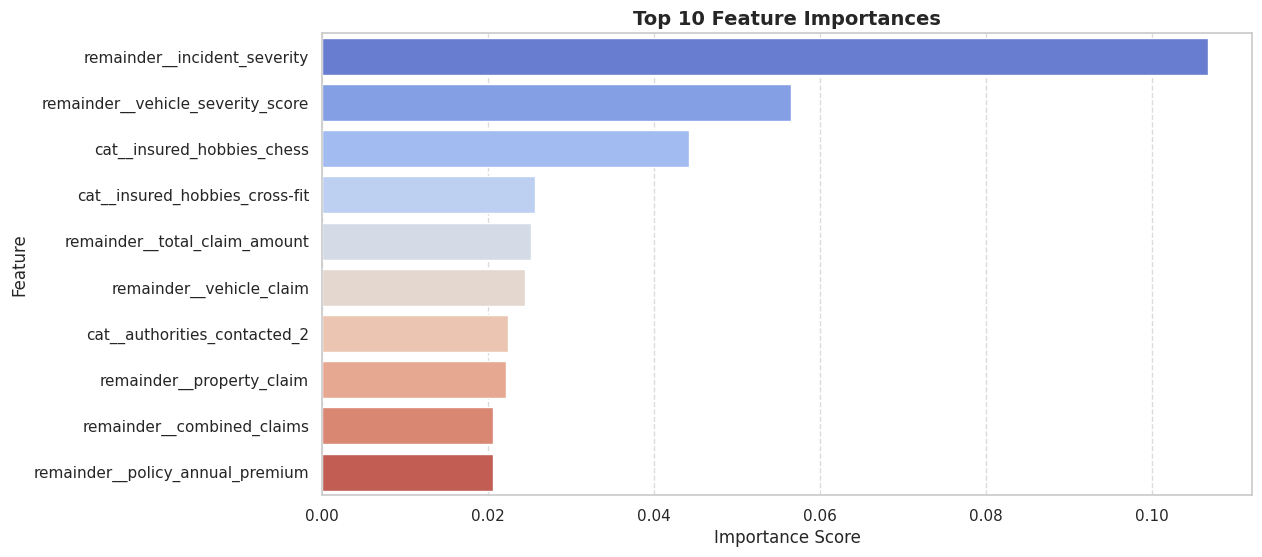

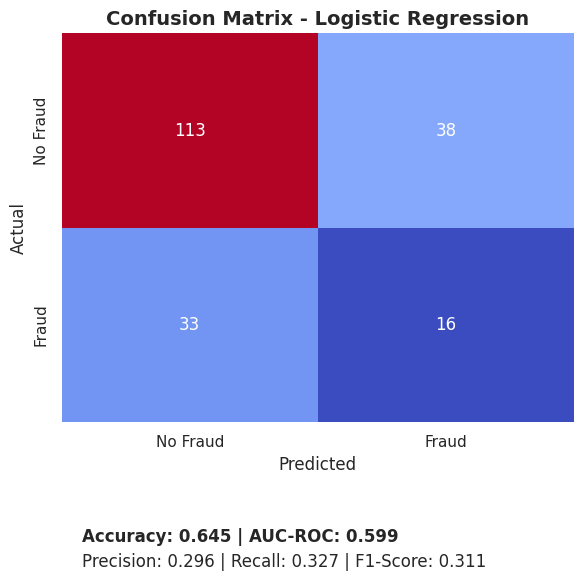

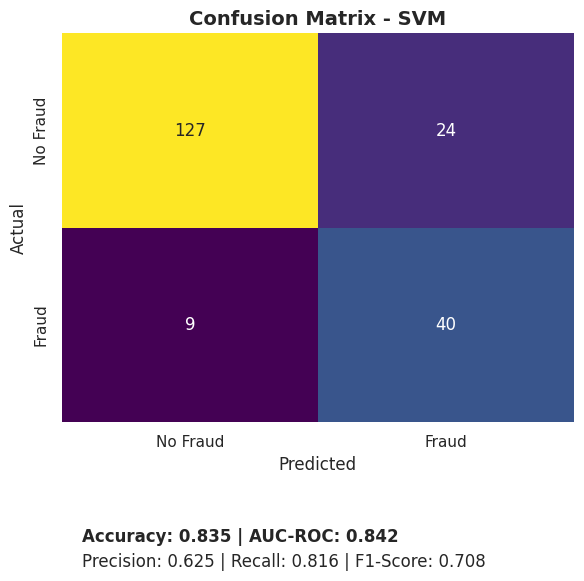

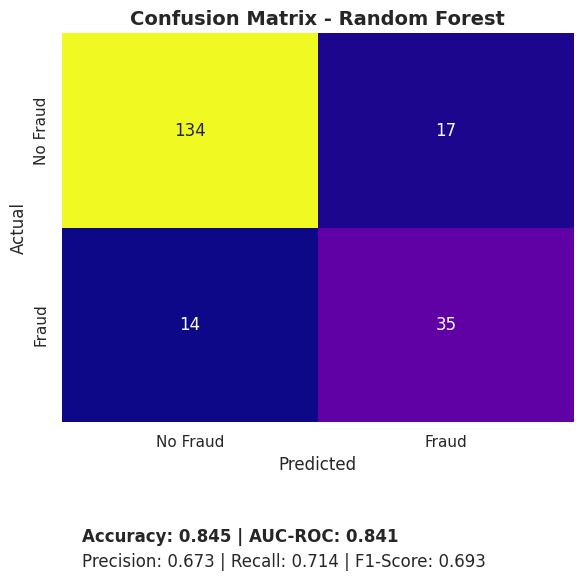

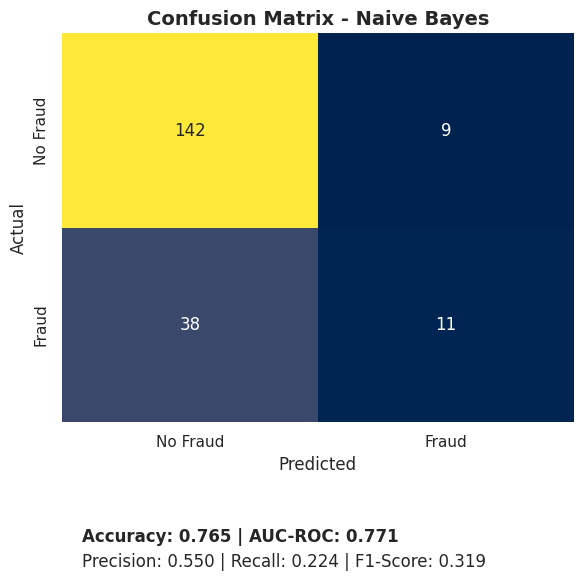

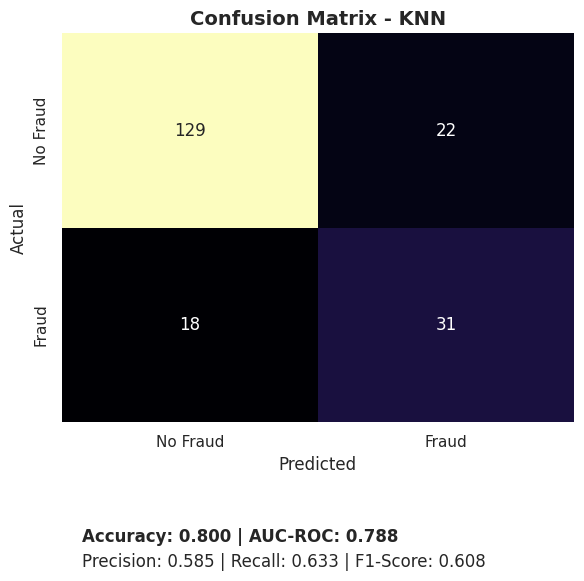

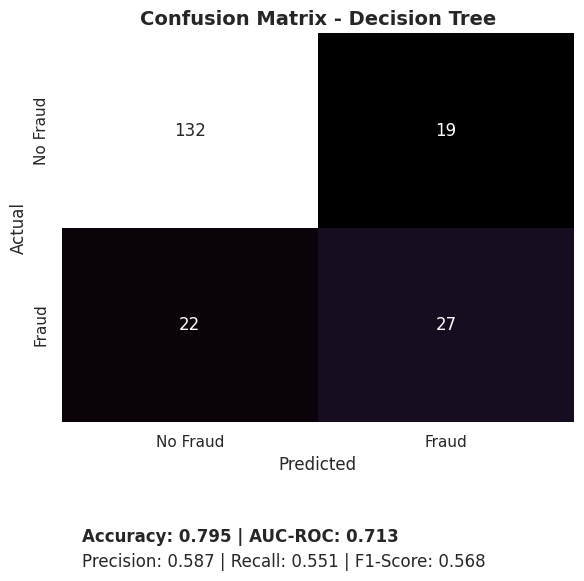

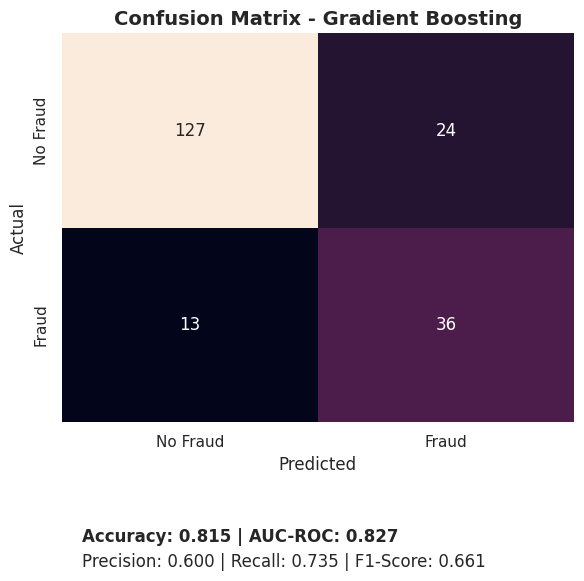

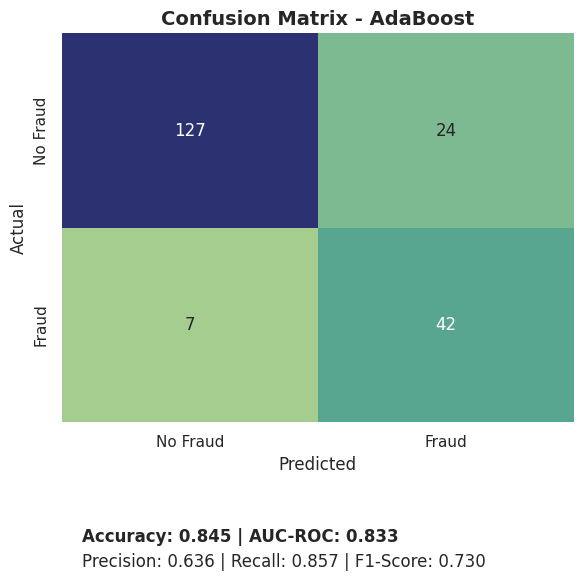

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:38:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


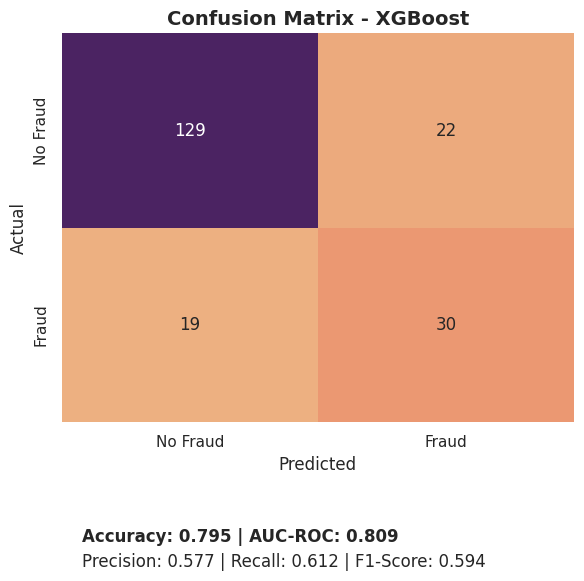

Model Performance Results After SMOTE and Feature Engineering:
              Model  Accuracy  Precision (0)  Precision (1)  Recall (0)  Recall (1)  F1-Score (0)  F1-Score (1)  AUC-ROC
Logistic Regression     0.645       0.773973       0.296296    0.748344    0.326531      0.760943      0.310680 0.599270
                SVM     0.835       0.933824       0.625000    0.841060    0.816327      0.885017      0.707965 0.842141
      Random Forest     0.845       0.905405       0.673077    0.887417    0.714286      0.896321      0.693069 0.841262
        Naive Bayes     0.765       0.788889       0.550000    0.940397    0.224490      0.858006      0.318841 0.771185
                KNN     0.800       0.877551       0.584906    0.854305    0.632653      0.865772      0.607843 0.788012
      Decision Tree     0.795       0.857143       0.586957    0.874172    0.551020      0.865574      0.568421 0.712596
  Gradient Boosting     0.815       0.907143       0.600000    0.841060    0.734694      0

In [44]:
# 📌 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 📌 Define unique colormaps for each model
colormaps = {
    "Logistic Regression": "coolwarm",
    "SVM": "viridis",
    "Random Forest": "plasma",
    "Naive Bayes": "cividis",
    "KNN": "magma",
    "Decision Tree": "cubehelix",
    "Gradient Boosting": "rocket",
    "AdaBoost": "crest",
    "XGBoost": "flare"
}

# 📌 Step 1: Identify Categorical and Numerical Features
categorical_cols = ['policy_csl', 'insured_sex', 'insured_education_level',
                    'insured_occupation', 'insured_relationship', 'incident_type',
                    'collision_type', 'authorities_contacted', 'property_damage',
                    'police_report_available', 'auto_make', 'auto_model', 'insured_hobbies', 'day_of_week']

numerical_cols = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium',
                  'umbrella_limit', 'capital-gains', 'capital-loss', 'bodily_injuries',
                  'witnesses', 'combined_claims', 'fraud_risk_time_score', 'vehicle_severity_score']

# 📌 Prepare Feature Set and Target Variable Cleanly
X_raw = data.drop(columns=['fraud_reported'])  # Ensure target is not in features
y = data['fraud_reported'].map({'N': 0, 'Y': 1})  # Map target to binary

# 📌 Step 2: Encode Categorical Features Using One-Hot Encoding
encoder = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
], remainder='passthrough')

# Apply encoding
X_encoded = encoder.fit_transform(X_raw)
encoded_feature_names = encoder.get_feature_names_out()
X = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# 📌 Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 📌 Step 4: Apply Standard Scaling to Improve Model Performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 Step 5: Apply SMOTE to Balance the Dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 📌 Step 6: Feature Importance Analysis Using RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Extract and Select Top 10 Important Features
feature_importance = pd.DataFrame({
    "Feature": encoded_feature_names,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_features = feature_importance.head(10)["Feature"].values
X_train_balanced = pd.DataFrame(X_train_balanced, columns=encoded_feature_names)[top_features]
X_test = pd.DataFrame(X_test, columns=encoded_feature_names)[top_features]

# 📊 Plot Feature Importance
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance["Importance"][:10], y=feature_importance["Feature"][:10], palette="coolwarm")
plt.title("Top 10 Feature Importances", fontsize=14, fontweight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# 📌 Build Models After SMOTE & Feature Selection
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 📌 Train Models and Evaluate
results = []
roc_colors = sns.color_palette("tab10", len(models))

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score_val = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    precision_0 = precision_score(y_test, y_pred, pos_label=0, zero_division=0)
    precision_1 = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_0 = f1_score(y_test, y_pred, pos_label=0)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision (0)": precision_0,
        "Precision (1)": precision_1,
        "Recall (0)": recall_0,
        "Recall (1)": recall_1,
        "F1-Score (0)": f1_0,
        "F1-Score (1)": f1_1,
        "AUC-ROC": auc_score_val
    })

    # 📊 Confusion Matrix with model-specific colormap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap=colormaps.get(model_name, "Blues"), cbar=False,
                xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
    plt.title(f"Confusion Matrix - {model_name}", fontsize=14, fontweight="bold")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.figtext(0.15, -0.1, f"Accuracy: {accuracy:.3f} | AUC-ROC: {auc_score_val if isinstance(auc_score_val, str) else round(auc_score_val, 3)}", fontsize=12, fontweight="bold", ha="left")
    plt.figtext(0.15, -0.15, f"Precision: {precision_1:.3f} | Recall: {recall_1:.3f} | F1-Score: {f1_1:.3f}", fontsize=12, ha="left")

    plt.tight_layout()
    plt.show()

# 📌 Display Model Performance
results_df = pd.DataFrame(results)
print("Model Performance Results After SMOTE and Feature Engineering:")
print(results_df.to_string(index=False))

# 📈 Model Comparison using Plotly
fig = px.bar(
    data_frame=results_df.sort_values(by="Accuracy", ascending=True),
    x='Accuracy', y='Model', color='Accuracy',
    title='Model Comparison Based on Accuracy',
    template='plotly_dark',
    labels={'Accuracy': 'Model Accuracy', 'Model': 'Machine Learning Model'},
    orientation='h'
)
fig.show()


*Area Under the Receiver Operating Characteristic Curve*

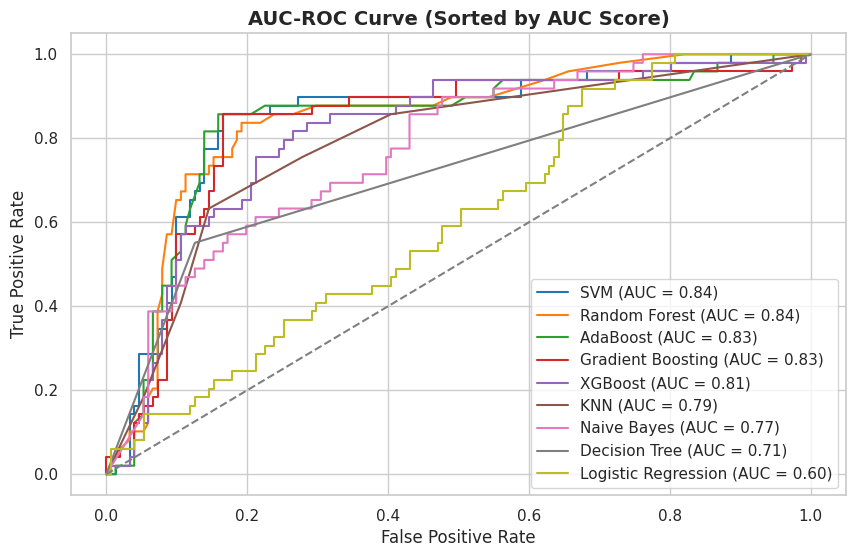

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Dictionary to store model AUC-ROC scores
auc_scores = {}

# Compute AUC-ROC scores
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc_scores[model_name] = roc_auc_score(y_test, y_proba)

# Sort models by AUC-ROC score in descending order
sorted_models = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)

# Plot settings
plt.figure(figsize=(10, 6))
roc_colors = sns.color_palette("tab10", len(models))

# Plot AUC-ROC curves in sorted order
for idx, (model_name, auc) in enumerate(sorted_models):
    model = models[model_name]
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})", color=roc_colors[idx])

# Finalizing the plot
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve (Sorted by AUC Score)", fontsize=14, fontweight="bold")
plt.legend()
plt.show()

*Model Comparison*

In [46]:
# Replace "N/A" in AUC-ROC with NaN to ensure numerical consistency
results_df["AUC-ROC"] = pd.to_numeric(results_df["AUC-ROC"], errors='coerce')

# Sort models by Accuracy and AUC-ROC in descending order
results_df_sorted = results_df.sort_values(by=["Accuracy", "AUC-ROC"], ascending=[False, False])

# Melt the DataFrame for Plotly visualization
results_melted = results_df_sorted.melt(id_vars=['Model'], value_vars=['Accuracy', 'AUC-ROC'])

#Create the plot comparing Model Accuracy and AUC-ROC scores
fig = px.bar(
    data_frame=results_melted,
    x='Model',
    y='value',
    color='variable',
    title='Model Comparison Based on Accuracy and AUC-ROC Score',
    template='plotly_dark',
    labels={'Model': 'Machine Learning Model', 'value': 'Score'},
    barmode='group',
    height=500,
    color_discrete_sequence=['purple', 'gold']  # Ensuring distinct colors
)

# Ensure the x-axis follows the sorted model order
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': results_df_sorted['Model'].tolist()})

# Add score text on top of each bar
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside', hoverinfo='x+y')
fig.show()

In [47]:
# Convert AUC-ROC to numeric (handling "N/A" values)
results_df["AUC-ROC"] = pd.to_numeric(results_df["AUC-ROC"], errors='coerce')

# Define key metrics for sorting
metrics_to_plot = ["Accuracy", "Precision (1)", "Recall (1)", "F1-Score (1)", "AUC-ROC"]

# Sort models by Accuracy, then AUC-ROC, then F1-Score in descending order
results_df_sorted = results_df.sort_values(by=["Accuracy", "AUC-ROC", "F1-Score (1)"], ascending=[False, False, False])

# Melt the DataFrame for Plotly visualization
results_melted = results_df_sorted.melt(id_vars=['Model'], value_vars=metrics_to_plot, var_name='Metric', value_name='Score')

# Step 6: Model Comparison Visualization using Plotly for Multiple Metrics
fig = px.bar(
    data_frame=results_melted,
    x='Model', y='Score', color='Metric',
    title='Model Comparison Based on Performance in Predicting Class 1 (Fraud)',
    template='plotly_dark',
    labels={'Score': 'Metric Value', 'Model': 'Machine Learning Model', 'Metric': 'Performance Metric'},
    barmode='group'
)

# Ensure models appear in sorted order on x-axis
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': results_df_sorted['Model'].tolist()})

# Add the score text on top of each bar
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside', hoverinfo='x+y')

# Show the plot
fig.show()


*Top 5 Best Performing Models*

In [48]:
import plotly.express as px

# Convert AUC-ROC to numeric (handling "N/A" values)
results_df["AUC-ROC"] = pd.to_numeric(results_df["AUC-ROC"], errors='coerce')

# Define key metrics for sorting
metrics_to_plot = ["Accuracy", "Precision (1)", "Recall (1)", "F1-Score (1)", "AUC-ROC"]

# Sort models by Accuracy, then AUC-ROC, then F1-Score in descending order
results_df_sorted = results_df.sort_values(by=["Accuracy", "AUC-ROC", "F1-Score (1)"], ascending=[False, False, False])

# Remove the five least-performing models
results_df_filtered = results_df_sorted.iloc[:-5]  # Keep all except the last 5

# Melt the DataFrame for Plotly visualization
results_melted = results_df_filtered.melt(id_vars=['Model'], value_vars=metrics_to_plot, var_name='Metric', value_name='Score')

# Step 6: Model Comparison Visualization using Plotly for Multiple Metrics
fig = px.bar(
    data_frame=results_melted,
    x='Model', y='Score', color='Metric',
    title='Top 4 Best-Performing Fraud Detection Models',
    template='plotly_dark',
    labels={'Score': 'Metric Value', 'Model': 'Machine Learning Model', 'Metric': 'Performance Metric'},
    barmode='group'
)

# Ensure models appear in sorted order on x-axis
fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': results_df_filtered['Model'].tolist()})

# Add the score text on top of each bar
fig.update_traces(texttemplate='%{y:.3f}', textposition='outside', hoverinfo='x+y')

# Show the plot
fig.show()